# Swish-based classifier using cosine-annealed LR with restarts and data augmentation
- Swish activation, 4 layers, 100 neurons per layer
- LR using cosine-annealing with restarts and cycle multiplicity of 2
- Data is augmentaed via phi rotations, and transvers and longitudinal flips
- Validation score use ensemble of 10 models weighted by loss

### Import modules

In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
from __future__ import division
import sys
import os
sys.path.append('../')
from modules.basics import *
from modules.class_basics import *

/home/giles/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Options

In [2]:
with open(DATA_PATH/'feats.pkl', 'rb') as fin:
    train_feats = pickle.load(fin)
    train_feats = [var for x in train_feats for var in train_feats[x]]

In [3]:
n_models = 10
patience = 50
max_epochs = 200

ensemble_size = 10
ensemble_mode = 'loss'

compile_args = {'loss':'binary_crossentropy', 'optimizer':'adam'}
train_params = {'epochs' : 1, 'batch_size' : 256, 'verbose' : 0}
model_params = {'version':'modelSwish', 'n_in':len(train_feats), 'compile_args':compile_args, 'mode':'classifier'}

print ("\nTraining on", len(train_feats), "features:", [var for var in train_feats])


Training on 30 features: ['DER_mass_MMC', 'DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep', 'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_met_pt', 'PRI_met_sumet', 'PRI_jet_num', 'PRI_jet_all_pt', 'PRI_tau_px', 'PRI_tau_py', 'PRI_tau_pz', 'PRI_lep_px', 'PRI_lep_pz', 'PRI_jet_leading_px', 'PRI_jet_leading_py', 'PRI_jet_leading_pz', 'PRI_jet_subleading_px', 'PRI_jet_subleading_py', 'PRI_jet_subleading_pz', 'PRI_met_px', 'PRI_met_py']


## Import data

In [4]:
train_fy = FoldYielder(h5py.File(DATA_PATH/'train.hdf5', "r+"))

## Determine LR

2 classes found, running in binary mode



/home/giles/anaconda3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The tsplot function is deprecated and will be removed or replaced (in a substantially altered version) in a future release.
  warnings.warn(msg, UserWarning)
No handles with labels found to put in legend.



______________________________________
Training finished
Cross-validation took 16.321s 


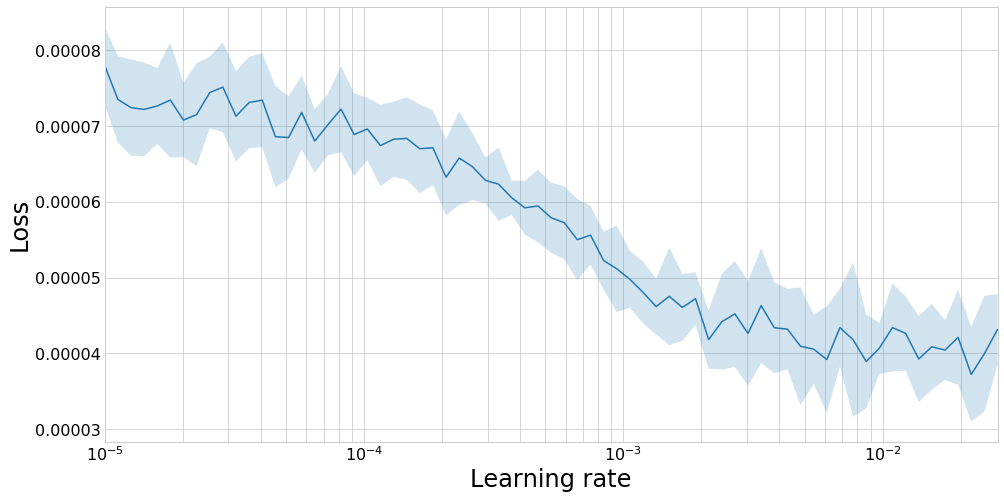

______________________________________



In [5]:
lr_finder = fold_lr_find(train_fy, get_model, model_params, train_params,
                         lr_bounds=[1e-5,1e-1], train_on_weights=True, verbose=0)

## Train classifier

In [6]:
model_gen_params = {**model_params, 'compile_args':{**compile_args, 'lr':2e-3}}
use_callbacks = {'SWA':{'renewal':10, 'sgd_replacement':False, 'start':10},}
ams_args = {'n_total':250000, 'br':10, 'delta_b':0}
plots = ['history', 'lr']

Training using weights
Training model 1 / 10
2 classes found, running in binary mode

1 New best found: 3.498952200752683e-05
2 New best found: 3.4219574829330666e-05
3 New best found: 3.299137515714392e-05
5 New best found: 3.293455275270389e-05
6 New best found: 3.270503765234025e-05
8 New best found: 3.2682850883429636e-05
SWA beginning
model is 0 epochs old
10 swa loss 3.25125993025722e-05, default loss 3.25125993025722e-05
10 New best found: 3.25125993025722e-05
model is 1 epochs old
11 swa loss 3.209855660243193e-05, default loss 3.235721848468529e-05
11 New best found: 3.209855660243193e-05
model is 2 epochs old
12 swa loss 3.189059983851621e-05, default loss 3.217259743832983e-05
12 New best found: 3.189059983851621e-05
model is 3 epochs old
13 swa loss 3.175264508608962e-05, default loss 3.1838186692039014e-05
13 New best found: 3.175264508608962e-05
model is 4 epochs old
14 swa loss 3.167532697261777e-05, default loss 3.224740042933263e-05
14 New best found: 3.167532697261777

model is 31 epochs old
new model is 1 epochs old
61 swa loss 3.118842063486227e-05, default loss 3.183216299221385e-05
model is 32 epochs old
new model is 2 epochs old
62 swa loss 3.1181356799061174e-05, default loss 3.166634318913566e-05
62 New best found: 3.1181356799061174e-05
model is 33 epochs old
new model is 3 epochs old
63 swa loss 3.117987197329057e-05, default loss 3.1879893539007756e-05
63 New best found: 3.117987197329057e-05
model is 34 epochs old
new model is 4 epochs old
64 swa loss 3.117478275744361e-05, default loss 3.19066239069798e-05
64 New best found: 3.117478275744361e-05
model is 35 epochs old
new model is 5 epochs old
65 swa loss 3.1174805810587714e-05, default loss 3.231961414712714e-05
model is 36 epochs old
new model is 6 epochs old
66 swa loss 3.117423369549215e-05, default loss 3.2143936704960654e-05
66 New best found: 3.117423369549215e-05
model is 37 epochs old
new model is 7 epochs old
67 swa loss 3.1166292200214226e-05, default loss 3.1712706334656106e-

model is 90 epochs old
new model is 10 epochs old
120 swa loss 3.1156617711531e-05, default loss 3.190382698812755e-05
model is 91 epochs old
new model is 11 epochs old
121 swa loss 3.1157280615298075e-05, default loss 3.1946868961676956e-05
model is 92 epochs old
new model is 12 epochs old
122 swa loss 3.1158991963457083e-05, default loss 3.2330617704428735e-05
model is 93 epochs old
new model is 13 epochs old
123 swa loss 3.115969182254048e-05, default loss 3.207824586206698e-05
model is 94 epochs old
new model is 14 epochs old
124 swa loss 3.1161640295613326e-05, default loss 3.206524248671485e-05
model is 95 epochs old
new model is 15 epochs old
125 swa loss 3.116295958825503e-05, default loss 3.245705422377796e-05
model is 96 epochs old
new model is 16 epochs old
126 swa loss 3.1161526660434903e-05, default loss 3.1740514865668957e-05
model is 97 epochs old
new model is 17 epochs old
127 swa loss 3.1165277682157464e-05, default loss 3.257431376259774e-05
model is 98 epochs old
new

model is 27 epochs old
new model is 7 epochs old
37 swa loss 3.143512143267181e-05, default loss 3.169096846366659e-05
37 New best found: 3.143512143267181e-05
model is 28 epochs old
new model is 8 epochs old
38 swa loss 3.1426187814398935e-05, default loss 3.186819812599898e-05
38 New best found: 3.1426187814398935e-05
model is 29 epochs old
new model is 9 epochs old
39 swa loss 3.14215415422819e-05, default loss 3.196213707954632e-05
39 New best found: 3.14215415422819e-05
model is 30 epochs old
new model is 10 epochs old
40 swa loss 3.1416769777084616e-05, default loss 3.197055692839561e-05
40 New best found: 3.1416769777084616e-05
model is 31 epochs old
new model is 11 epochs old
41 swa loss 3.141527472080974e-05, default loss 3.209145364719746e-05
41 New best found: 3.141527472080974e-05
model is 32 epochs old
new model is 12 epochs old
42 swa loss 3.141105006189793e-05, default loss 3.192124200878599e-05
42 New best found: 3.141105006189793e-05
model is 33 epochs old
new model is

model is 61 epochs old
new model is 11 epochs old
91 swa loss 3.123930779624217e-05, default loss 3.194255724217288e-05
model is 62 epochs old
new model is 12 epochs old
92 swa loss 3.123809828906367e-05, default loss 3.164660203488361e-05
model is 63 epochs old
new model is 13 epochs old
93 swa loss 3.1239775960242814e-05, default loss 3.216921241345949e-05
model is 64 epochs old
new model is 14 epochs old
94 swa loss 3.1241719854949576e-05, default loss 3.226334825414795e-05
model is 65 epochs old
new model is 15 epochs old
95 swa loss 3.124536035534108e-05, default loss 3.2342778636021425e-05
model is 66 epochs old
new model is 16 epochs old
96 swa loss 3.124808812270946e-05, default loss 3.2550911433617515e-05
model is 67 epochs old
new model is 17 epochs old
97 swa loss 3.1247518586904993e-05, default loss 3.187107140719937e-05
model is 68 epochs old
new model is 18 epochs old
98 swa loss 3.124576558331784e-05, default loss 3.177519947024428e-05
model is 69 epochs old
new model is

26 swa loss 3.209760551515102e-05, default loss 3.2447611868404104e-05
26 New best found: 3.209760551515102e-05
model is 17 epochs old
new model is 7 epochs old
27 swa loss 3.209226794434623e-05, default loss 3.274639472866639e-05
27 New best found: 3.209226794434623e-05
model is 18 epochs old
new model is 8 epochs old
28 swa loss 3.208876586362803e-05, default loss 3.270483758727952e-05
28 New best found: 3.208876586362803e-05
model is 19 epochs old
new model is 9 epochs old
29 swa loss 3.207689538796958e-05, default loss 3.239294849947632e-05
29 New best found: 3.207689538796958e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.20612484120179e-05, new model: 3.2167904267735885e-05
Current model better, renewing
____________________


30 swa loss 3.20612484120179e-05, default loss 3.270693450864195e-05
30 New best found: 3.20612484120179e-05
model is 21 epochs old
new model is 1 epochs old
31 swa loss 3.2055443292091095e-05, default los

model is 47 epochs old
new model is 17 epochs old
77 swa loss 3.176539530024941e-05, default loss 3.288208781860239e-05
model is 48 epochs old
new model is 18 epochs old
78 swa loss 3.1763401431580326e-05, default loss 3.218157390225744e-05
model is 49 epochs old
new model is 19 epochs old
79 swa loss 3.175940809858295e-05, default loss 3.223020413896773e-05
79 New best found: 3.175940809858295e-05
model is 50 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.1756890495382246e-05, new model: 3.172415820605106e-05
New model better, replacing
____________________


80 swa loss 3.172415820605106e-05, default loss 3.218863534153387e-05
80 New best found: 3.172415820605106e-05
model is 21 epochs old
new model is 1 epochs old
81 swa loss 3.172284117860081e-05, default loss 3.227043291079923e-05
81 New best found: 3.172284117860081e-05
model is 22 epochs old
new model is 2 epochs old
82 swa loss 3.172749343157428e-05, default loss 3.2712112606705876e-05
model 

model is 80 epochs old
new model is 30 epochs old
Checking renewal swa model, current model: 3.179671339275499e-05, new model: 3.199766861449901e-05
Current model better, renewing
____________________


140 swa loss 3.179671339275499e-05, default loss 3.3082673696007685e-05
model is 81 epochs old
new model is 1 epochs old
141 swa loss 3.180018408583384e-05, default loss 3.291130289834555e-05
model is 82 epochs old
new model is 2 epochs old
142 swa loss 3.1801972515742486e-05, default loss 3.252908569520683e-05
model is 83 epochs old
new model is 3 epochs old
143 swa loss 3.1803376974003846e-05, default loss 3.256537546890327e-05
model is 84 epochs old
new model is 4 epochs old
144 swa loss 3.180641043772475e-05, default loss 3.3152915788723274e-05
model is 85 epochs old
new model is 5 epochs old
145 swa loss 3.18091594171779e-05, default loss 3.3079094967363156e-05
model is 86 epochs old
new model is 6 epochs old
146 swa loss 3.181342787675613e-05, default loss 3.320180781112178e-05
mo

50 swa loss 3.119729329482652e-05, default loss 3.196210943569895e-05
50 New best found: 3.119729329482652e-05
model is 21 epochs old
new model is 1 epochs old
51 swa loss 3.1191592330287677e-05, default loss 3.1719016561692114e-05
51 New best found: 3.1191592330287677e-05
model is 22 epochs old
new model is 2 epochs old
52 swa loss 3.1188121470040644e-05, default loss 3.1926764411036855e-05
52 New best found: 3.1188121470040644e-05
model is 23 epochs old
new model is 3 epochs old
53 swa loss 3.119053810733021e-05, default loss 3.1810100653092376e-05
model is 24 epochs old
new model is 4 epochs old
54 swa loss 3.119626939515001e-05, default loss 3.1815970932075285e-05
model is 25 epochs old
new model is 5 epochs old
55 swa loss 3.1196726521739034e-05, default loss 3.2056192474556156e-05
model is 26 epochs old
new model is 6 epochs old
56 swa loss 3.1191913057409695e-05, default loss 3.201776065325248e-05
model is 27 epochs old
new model is 7 epochs old
57 swa loss 3.1188602982729205e-0

18 swa loss 3.273244938264034e-05, default loss 3.3002809138428257e-05
18 New best found: 3.273244938264034e-05
model is 9 epochs old
19 swa loss 3.2682067616662415e-05, default loss 3.2840979529772287e-05
19 New best found: 3.2682067616662415e-05
model is 10 epochs old
20 swa loss 3.26606657836328e-05, default loss 3.284845725112509e-05
20 New best found: 3.26606657836328e-05
model is 11 epochs old
new model is 1 epochs old
21 swa loss 3.266212073536797e-05, default loss 3.3154580965184084e-05
model is 12 epochs old
new model is 2 epochs old
22 swa loss 3.262081981544863e-05, default loss 3.300705027545455e-05
22 New best found: 3.262081981544863e-05
model is 13 epochs old
new model is 3 epochs old
23 swa loss 3.262025638794286e-05, default loss 3.3309420738104745e-05
23 New best found: 3.262025638794286e-05
model is 14 epochs old
new model is 4 epochs old
24 swa loss 3.2602222857815444e-05, default loss 3.309376817823391e-05
24 New best found: 3.2602222857815444e-05
model is 15 epoch

68 swa loss 3.2244637982207345e-05, default loss 3.2870618592063276e-05
model is 19 epochs old
new model is 9 epochs old
69 swa loss 3.2246807247098474e-05, default loss 3.2795326844605946e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.2251784955195156e-05, new model: 3.230230211772346e-05
Current model better, renewing
____________________


70 swa loss 3.2251784955195156e-05, default loss 3.2914301701244e-05
model is 21 epochs old
new model is 1 epochs old
71 swa loss 3.224462404266975e-05, default loss 3.2824746951265444e-05
model is 22 epochs old
new model is 2 epochs old
72 swa loss 3.2234310131386667e-05, default loss 3.2932585976593246e-05
model is 23 epochs old
new model is 3 epochs old
73 swa loss 3.2235133736532305e-05, default loss 3.2820387147430814e-05
model is 24 epochs old
new model is 4 epochs old
74 swa loss 3.2235850884162986e-05, default loss 3.272006502865176e-05
model is 25 epochs old
new model is 5 epochs old
75 

23 swa loss 3.166245326344902e-05, default loss 3.185739343573519e-05
23 New best found: 3.166245326344902e-05
model is 14 epochs old
new model is 4 epochs old
24 swa loss 3.164116090157802e-05, default loss 3.235049978105388e-05
24 New best found: 3.164116090157802e-05
model is 15 epochs old
new model is 5 epochs old
25 swa loss 3.162970183215964e-05, default loss 3.190238041789704e-05
25 New best found: 3.162970183215964e-05
model is 16 epochs old
new model is 6 epochs old
26 swa loss 3.160849912839368e-05, default loss 3.197760538673497e-05
26 New best found: 3.160849912839368e-05
model is 17 epochs old
new model is 7 epochs old
27 swa loss 3.159882475034633e-05, default loss 3.2891632449733834e-05
27 New best found: 3.159882475034633e-05
model is 18 epochs old
new model is 8 epochs old
28 swa loss 3.1590918702315564e-05, default loss 3.194407523579504e-05
28 New best found: 3.1590918702315564e-05
model is 19 epochs old
new model is 9 epochs old
29 swa loss 3.158465942371075e-05, de

model is 24 epochs old
new model is 4 epochs old
74 swa loss 3.1176449924678536e-05, default loss 3.1734918877023656e-05
model is 25 epochs old
new model is 5 epochs old
75 swa loss 3.1175496945770354e-05, default loss 3.223720118101234e-05
model is 26 epochs old
new model is 6 epochs old
76 swa loss 3.116838702444295e-05, default loss 3.14808493218098e-05
model is 27 epochs old
new model is 7 epochs old
77 swa loss 3.1163034237693e-05, default loss 3.1517769713185824e-05
model is 28 epochs old
new model is 8 epochs old
78 swa loss 3.116287700484562e-05, default loss 3.197520911954723e-05
model is 29 epochs old
new model is 9 epochs old
79 swa loss 3.117027304777625e-05, default loss 3.2266842247474535e-05
model is 30 epochs old
new model is 10 epochs old
80 swa loss 3.1167881130646326e-05, default loss 3.1886446119564283e-05
model is 31 epochs old
new model is 11 epochs old
81 swa loss 3.117251098748501e-05, default loss 3.201915312307257e-05
model is 32 epochs old
new model is 12 epo

25 swa loss 3.2223023187392605e-05, default loss 3.237532931757586e-05
25 New best found: 3.2223023187392605e-05
model is 16 epochs old
new model is 6 epochs old
26 swa loss 3.218810422271731e-05, default loss 3.2341891872519144e-05
26 New best found: 3.218810422271731e-05
model is 17 epochs old
new model is 7 epochs old
27 swa loss 3.216711329310318e-05, default loss 3.236532565242176e-05
27 New best found: 3.216711329310318e-05
model is 18 epochs old
new model is 8 epochs old
28 swa loss 3.214367278987956e-05, default loss 3.247193217735027e-05
28 New best found: 3.214367278987956e-05
model is 19 epochs old
new model is 9 epochs old
29 swa loss 3.212404578488857e-05, default loss 3.2499623991065004e-05
29 New best found: 3.212404578488857e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.211029737528113e-05, new model: 3.2146913034588514e-05
Current model better, renewing
____________________


30 swa loss 3.211029737528113e-05, defaul

model is 46 epochs old
new model is 16 epochs old
76 swa loss 3.173399307317503e-05, default loss 3.2501294117300846e-05
76 New best found: 3.173399307317503e-05
model is 47 epochs old
new model is 17 epochs old
77 swa loss 3.173657351688269e-05, default loss 3.2637154762012795e-05
model is 48 epochs old
new model is 18 epochs old
78 swa loss 3.173786722482212e-05, default loss 3.231016075794508e-05
model is 49 epochs old
new model is 19 epochs old
79 swa loss 3.173657729256588e-05, default loss 3.219453966915885e-05
model is 50 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.17341819719366e-05, new model: 3.175410461677783e-05
Current model better, renewing
____________________


80 swa loss 3.17341819719366e-05, default loss 3.251959231847125e-05
model is 51 epochs old
new model is 1 epochs old
81 swa loss 3.173358862667038e-05, default loss 3.225555717345617e-05
81 New best found: 3.173358862667038e-05
model is 52 epochs old
new model is 2 epochs o

model is 3 epochs old
13 swa loss 3.219946383396746e-05, default loss 3.2359107166121246e-05
13 New best found: 3.219946383396746e-05
model is 4 epochs old
14 swa loss 3.205806464102352e-05, default loss 3.221717017877381e-05
14 New best found: 3.205806464102352e-05
model is 5 epochs old
15 swa loss 3.1936916559061504e-05, default loss 3.276058360206662e-05
15 New best found: 3.1936916559061504e-05
model is 6 epochs old
16 swa loss 3.190356230334146e-05, default loss 3.263585925160441e-05
16 New best found: 3.190356230334146e-05
model is 7 epochs old
17 swa loss 3.1871786122064804e-05, default loss 3.231082484562649e-05
17 New best found: 3.1871786122064804e-05
model is 8 epochs old
18 swa loss 3.185121088317828e-05, default loss 3.275213550077751e-05
18 New best found: 3.185121088317828e-05
model is 9 epochs old
19 swa loss 3.1826673262548864e-05, default loss 3.303406439226819e-05
19 New best found: 3.1826673262548864e-05
model is 10 epochs old
20 swa loss 3.18084292623098e-05, defau

model is 14 epochs old
new model is 4 epochs old
64 swa loss 3.142126976163126e-05, default loss 3.2215278724470407e-05
model is 15 epochs old
new model is 5 epochs old
65 swa loss 3.142537474705023e-05, default loss 3.213013214262901e-05
model is 16 epochs old
new model is 6 epochs old
66 swa loss 3.142054839845514e-05, default loss 3.204890248889569e-05
model is 17 epochs old
new model is 7 epochs old
67 swa loss 3.142783213697839e-05, default loss 3.2303249982214764e-05
model is 18 epochs old
new model is 8 epochs old
68 swa loss 3.142950632245629e-05, default loss 3.2045338630268814e-05
model is 19 epochs old
new model is 9 epochs old
69 swa loss 3.143135739592253e-05, default loss 3.195188800964388e-05
model is 20 epochs old
new model is 10 epochs old
Checking renewal swa model, current model: 3.1419708543398885e-05, new model: 3.143233588780277e-05
Current model better, renewing
____________________


70 swa loss 3.1419708543398885e-05, default loss 3.1946320510178336e-05
model i

126 swa loss 3.144882098131348e-05, default loss 3.207913666628883e-05
model is 77 epochs old
new model is 7 epochs old
127 swa loss 3.145214411779307e-05, default loss 3.246992791900993e-05
model is 78 epochs old
new model is 8 epochs old
128 swa loss 3.145529002431431e-05, default loss 3.279964812027174e-05
model is 79 epochs old
new model is 9 epochs old
129 swa loss 3.1457060018874474e-05, default loss 3.274216829522629e-05
model is 80 epochs old
new model is 10 epochs old
130 swa loss 3.145949466706952e-05, default loss 3.274677749723196e-05
model is 81 epochs old
new model is 11 epochs old
131 swa loss 3.146333436816349e-05, default loss 3.265936486131977e-05
model is 82 epochs old
new model is 12 epochs old
132 swa loss 3.146590832620859e-05, default loss 3.2548563122691124e-05
model is 83 epochs old
new model is 13 epochs old
133 swa loss 3.146479824281414e-05, default loss 3.220927844813559e-05
model is 84 epochs old
new model is 14 epochs old
134 swa loss 3.146679550773115e-0

model is 37 epochs old
new model is 17 epochs old
47 swa loss 3.2106042383699e-05, default loss 3.3550268375356324e-05
model is 38 epochs old
new model is 18 epochs old
48 swa loss 3.2103355345520553e-05, default loss 3.277654039080871e-05
48 New best found: 3.2103355345520553e-05
model is 39 epochs old
new model is 19 epochs old
49 swa loss 3.209841361981526e-05, default loss 3.263150600870578e-05
49 New best found: 3.209841361981526e-05
model is 40 epochs old
new model is 20 epochs old
Checking renewal swa model, current model: 3.209659055403454e-05, new model: 3.206437395274399e-05
New model better, replacing
____________________


50 swa loss 3.206437395274399e-05, default loss 3.2866597128200185e-05
50 New best found: 3.206437395274399e-05
model is 21 epochs old
new model is 1 epochs old
51 swa loss 3.2074662450591925e-05, default loss 3.3084103378148886e-05
model is 22 epochs old
new model is 2 epochs old
52 swa loss 3.2066807164271396e-05, default loss 3.261000772903025e-05
mode

model is 6 epochs old
16 swa loss 3.291206969588529e-05, default loss 3.341807149117813e-05
16 New best found: 3.291206969588529e-05
model is 7 epochs old
17 swa loss 3.286687362124212e-05, default loss 3.320823386020493e-05
17 New best found: 3.286687362124212e-05
model is 8 epochs old
18 swa loss 3.282954618043732e-05, default loss 3.418329890118912e-05
18 New best found: 3.282954618043732e-05
model is 9 epochs old
19 swa loss 3.2828700810205194e-05, default loss 3.3252524126146455e-05
19 New best found: 3.2828700810205194e-05
model is 10 epochs old
20 swa loss 3.281669586140197e-05, default loss 3.3289119400433265e-05
20 New best found: 3.281669586140197e-05
model is 11 epochs old
new model is 1 epochs old
21 swa loss 3.2812444202136246e-05, default loss 3.341266425559297e-05
21 New best found: 3.2812444202136246e-05
model is 12 epochs old
new model is 2 epochs old
22 swa loss 3.2808205680339597e-05, default loss 3.3297439533635044e-05
22 New best found: 3.2808205680339597e-05
model

69 swa loss 3.26071523653809e-05, default loss 3.347761694603832e-05
model is 40 epochs old
new model is 10 epochs old
70 swa loss 3.260773840884212e-05, default loss 3.393515757343266e-05
model is 41 epochs old
new model is 11 epochs old
71 swa loss 3.260731232730904e-05, default loss 3.325413246784592e-05
model is 42 epochs old
new model is 12 epochs old
72 swa loss 3.260737934324425e-05, default loss 3.326504709984874e-05
model is 43 epochs old
new model is 13 epochs old
73 swa loss 3.2609602867159994e-05, default loss 3.328667650639545e-05
model is 44 epochs old
new model is 14 epochs old
74 swa loss 3.2606370803841854e-05, default loss 3.307901055086404e-05
model is 45 epochs old
new model is 15 epochs old
75 swa loss 3.260618597851135e-05, default loss 3.3281981902837286e-05
model is 46 epochs old
new model is 16 epochs old
76 swa loss 3.2609907248115635e-05, default loss 3.342838496319018e-05
model is 47 epochs old
new model is 17 epochs old
77 swa loss 3.261121851828648e-05, de

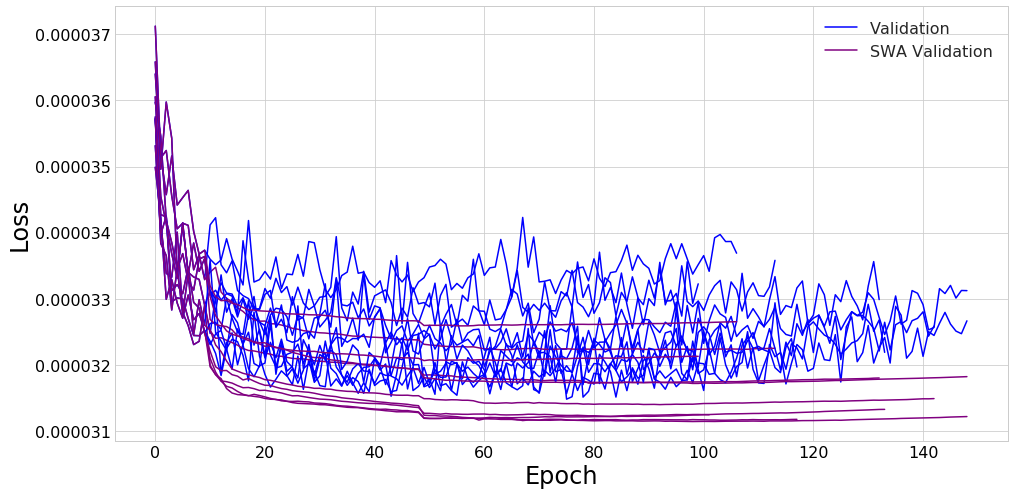

Mean loss = 3.16e-05 +- 2e-07
Mean wAUC = 0.0628 +- 0.0006
Mean AUC = 0.0981 +- 0.0009
Mean AMS = 3.9 +- 0.09
Mean cut = 0.958 +- 0.004
______________________________________



<Figure size 432x288 with 0 Axes>

In [7]:
results, histories, cycle_losses = fold_train_model(train_fy, n_models,
                                                    model_gen_params=model_gen_params,
                                                    train_params=train_params, train_on_weights=True,
                                                    use_callbacks=use_callbacks, ams_args=ams_args,
                                                    max_epochs=max_epochs, patience=patience,
                                                    verbose=1, plots=plots)

## Construct ensemble

In [8]:
with open('train_weights/results_file.pkl', 'rb') as fin:   
    results = pickle.load(fin)

In [9]:
%%capture --no-stdout
ensemble, weights = assemble_ensemble(results, ensemble_size, metric=ensemble_mode)

Choosing ensemble by loss
Model 0 is 0 with loss = 3.114236718683969e-05
Model 1 is 5 with loss = 3.115701511489559e-05
Model 2 is 3 with loss = 3.1188121470040644e-05
Model 3 is 1 with loss = 3.1221938020921894e-05
Model 4 is 7 with loss = 3.139824844402028e-05
Model 5 is 2 with loss = 3.1718486565078196e-05
Model 6 is 6 with loss = 3.173174906019364e-05
Model 7 is 8 with loss = 3.206437395274399e-05
Model 8 is 4 with loss = 3.222849868218205e-05
Model 9 is 9 with loss = 3.2589466631179676e-05


## Response on validation data without TTA

In [10]:
val_fy = FoldYielder(h5py.File(DATA_PATH/'val.hdf5', "r+"))

In [11]:
fold_ensemble_predict(ensemble, weights, val_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0013910249710083007s per sample

Predicting fold 2 out of 10
Prediction took 0.00035982921607792377s per sample

Predicting fold 3 out of 10
Prediction took 0.00036269652247428896s per sample

Predicting fold 4 out of 10
Prediction took 0.0003685006305575371s per sample

Predicting fold 5 out of 10
Prediction took 0.0003632001847028732s per sample

Predicting fold 6 out of 10
Prediction took 0.0003649131741374731s per sample

Predicting fold 7 out of 10
Prediction took 0.00036208688132464886s per sample

Predicting fold 8 out of 10
Prediction took 0.0003628916256129742s per sample

Predicting fold 9 out of 10
Prediction took 0.0003630968395620585s per sample

Predicting fold 10 out of 10
Prediction took 0.00036567794755101206s per sample



In [12]:
val_df = convert_to_df(val_fy.source)

50000 candidates loaded


In [13]:
print('Testing ROC AUC: unweighted {}, weighted {}'.format(roc_auc_score(val_df.gen_target, val_df.pred_class),
                                                           roc_auc_score(val_df.gen_target, val_df.pred_class, sample_weight=val_df.gen_weight)))

Testing ROC AUC: unweighted 0.903608190255126, weighted 0.9361648468600258


Best cut at 0.9614963472426474 corresponds to AMS of 3.8448540633184933
Maximum AMS for data is 3.9055505909001806 at cut of 0.963705837726593
CPU times: user 26 s, sys: 1.99 ms, total: 26 s
Wall time: 26.4 s


/home/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


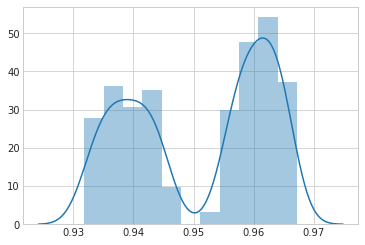

In [14]:
%%time
cut_kde = kde_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

Mean cut at 0.95106816 corresponds to AMS of 3.6880655171390773
Maximum AMS for data is 3.9055505909001806 at cut of 0.963705837726593
CPU times: user 87.3 ms, sys: 42.1 ms, total: 129 ms
Wall time: 81.9 ms


/home/giles/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


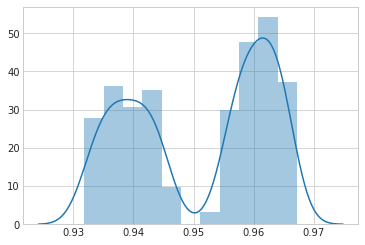

In [15]:
%%time
cut_mean = mean_optimise_cut(val_df, top_perc=0.05, br=10, w_factor=250000/50000)

# Test scoring - Without TTA

In [16]:
test_fy = FoldYielder(h5py.File(DATA_PATH/'testing.hdf5', "r+"))

In [17]:
%%time
fold_ensemble_predict(ensemble, weights, test_fy, ensemble_size=ensemble_size, verbose=1)

Predicting fold 1 out of 10
Prediction took 0.0003629380365325646s per sample

Predicting fold 2 out of 10
Prediction took 0.00036272453117099676s per sample

Predicting fold 3 out of 10
Prediction took 0.00035955025557089933s per sample

Predicting fold 4 out of 10
Prediction took 0.00035843995823101564s per sample

Predicting fold 5 out of 10
Prediction took 0.0003601676674390381s per sample

Predicting fold 6 out of 10
Prediction took 0.0003602318052202463s per sample

Predicting fold 7 out of 10
Prediction took 0.0003602922271937132s per sample

Predicting fold 8 out of 10
Prediction took 0.0003596452433615923s per sample

Predicting fold 9 out of 10
Prediction took 0.00036074097495187413s per sample

Predicting fold 10 out of 10
Prediction took 0.0003591856479983438s per sample

CPU times: user 3min 38s, sys: 5.51 s, total: 3min 44s
Wall time: 3min 18s


In [18]:
score_test_data(test_fy.source, cut_kde)

Public:Private AMS: 3.626710082974126 : 3.6960511533065925


(3.626710082974126, 3.6960511533065925)

In [19]:
score_test_data(test_fy.source, cut_mean)

Public:Private AMS: 3.7206105470162196 : 3.7887472000729208


(3.7206105470162196, 3.7887472000729208)

# Save/Load

In [ ]:
name = "weights/Swish_CLR_TTA"

In [ ]:
saveEnsemble(name, ensemble, weights, compile_args, overwrite=1)

In [ ]:
ensemble, weights, compile_args, _, _ = loadEnsemble(name)